In [1]:
import sys
sys.path.append('../python_packages_static')
import geopandas as gp
import flopy as fp
import mfsetup
import os
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pyproj



## Using [modflow-setup](https://github.com/aleaf/modflow-setup/tree/develop/mfsetup) it is possible to build only the discretization package to evaluate grid options.

#### get base dir - need this because MODFLOW setup leaves us in the model directory

In [2]:
basedir = os.getcwd()
basedir

'C:\\Users\\myuser\\Documents\\Project_Files\\NeversinkNY\\python\\GitLab\\neversink_workflow\\notebooks_preprocessing_complete'

## first get bounding box for the model domain

In [3]:
domain = gp.read_file('../source_data/shapefiles/Extents/Model_Extent_HUC12.shp')

### get the CRS - we'll need this lateron

In [4]:
epsg = pyproj.CRS(domain.crs).to_epsg()
epsg

5070

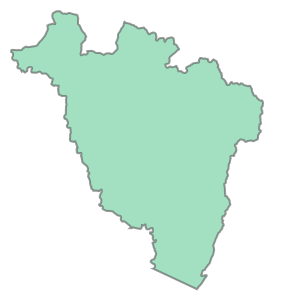

In [5]:
domain.geometry[0]

In [6]:
bounds = domain.geometry[0].bounds

In [7]:
tot_xdist, tot_ydist = bounds[2]+1000-bounds[0], bounds[3]+1000-bounds[1]
print (tot_xdist,tot_ydist)

30908.496492569335 33977.41590444837


### set grid spacing and set up grid

In [8]:
dx = 50
dy = dx

In [9]:
xcells = int(np.ceil(tot_xdist/dx))
ycells = int(np.ceil(tot_ydist/dy))

In [10]:
xcells,ycells, xcells*ycells

(619, 680, 420920)

## Read in the file `example.yml`

In [11]:
with open('example.yml', 'r') as ifp:
    inyml = yaml.load(ifp, Loader=yaml.FullLoader)

In [12]:
inyml['setup_grid']['xoff'] = bounds[0]
inyml['setup_grid']['yoff'] = bounds[1]


In [13]:
inyml['dis']['griddata']['delr'] = dy
inyml['dis']['griddata']['delc'] = dx

In [14]:
inyml['dis']['dimensions']['nlay'] = 1
inyml['dis']['dimensions']['nrow'] = ycells
inyml['dis']['dimensions']['ncol'] = xcells


In [15]:
with open('neversink.yml', 'w') as ofp:
    yaml.dump(inyml, ofp)

### now try to make just the DIS package

In [16]:
m = mfsetup.MF6model.setup_from_yaml('neversink.yml')

loading configuration file neversink.yml...

Setting up neversink model from data in None


validating configuration...
DIS package
done with validation.

setting up model grid...
wrote C:\Users\myuser\Documents\Project_Files\NeversinkNY\python\GitLab\neversink_workflow\notebooks_preprocessing_complete\tmp\neversink\neversink_grid.json
writing C:\Users\myuser\Documents\Project_Files\NeversinkNY\python\GitLab\neversink_workflow\notebooks_preprocessing_complete\tmp\neversink\postproc\shps\neversink_bbox.shp... Done
finished in 0.39s


Setting up TDIS package...
finished in 0.02s


Setting up IMS package...
finished in 0.00s


Setting up DIS package...
wrote .\external\top.dat, took 0.29s
loading original\neversink_top.dat.original, shape=(680, 619), took 0.38s
computing cell thicknesses...
finished in 14.25s

wrote .\external\top.dat, took 0.13s
wrote .\external\botm_000.dat, took 0.10s
wrote .\external\top.dat, took 0.13s

reading C:\Users\myuser\Documents\Project_Files\NeversinkNY\pyth

In [17]:
m.dis.idomain.array.sum() * 5

948490

### We can export the grid information as a shapefile to evaluate
NOTE: Errors indicating "No internet connection or epsg code ..." can be safely disregarded as warnings. They are due to restrictive network security preventing access to spatialreference.org but do not impact behavior of these notebooks.

In [18]:
m.dis.export('neverskink{}m.dis.shp'.format(dx))

wrote neverskink50m.dis.shp
(<class 'urllib.error.HTTPError'>, <HTTPError 404: 'NOT FOUND'>, <traceback object at 0x000001A45AD4EE80>)
(<class 'urllib.error.HTTPError'>, <HTTPError 404: 'NOT FOUND'>, <traceback object at 0x000001A45AD4ED40>)
No internet connection or epsg code 5070 not found at https://spatialreference.org/ref/epsg/5070/esriwkt
No internet connection or epsg code 5070 not found at https://spatialreference.org/ref/esri/5070/esriwkt
(<class 'urllib.error.HTTPError'>, <HTTPError 404: 'NOT FOUND'>, <traceback object at 0x000001A45AD61600>)
(<class 'urllib.error.HTTPError'>, <HTTPError 404: 'NOT FOUND'>, <traceback object at 0x000001A45AD61480>)
No internet connection or epsg code 5070 not found at https://spatialreference.org/ref/epsg/5070/esriwkt
No internet connection or epsg code 5070 not found at https://spatialreference.org/ref/esri/5070/esriwkt


In [19]:
os.chdir(basedir)
